In [1]:
import SimpleITK as sitk
import pims
# from nd2reader import ND2Reader
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.insert(0,'/home/jmamede/scripts')
# from support_pla import othercolor, cell_mask, multiply, rebin
from support_pla import convert16to8bits


from glob import glob

from pystackreg import StackReg
# from skimage imporsr,t io

def rebin(arr, new_shape):
    from PIL import Image
    return np.array(Image.fromarray(arr).resize(new_shape,resample=Image.NEAREST))

def calculate_reg(ref,mov,name):
    from pystackreg import StackReg
    transformations = {
        'TRANSLATION': StackReg.TRANSLATION,
        'RIGID_BODY': StackReg.RIGID_BODY,
        'SCALED_ROTATION': StackReg.SCALED_ROTATION,
        'AFFINE': StackReg.AFFINE,
        'BILINEAR': StackReg.BILINEAR
    }
    sr = StackReg(transformations[name])
    return sr.register(ref, mov,)

def registration(image,tmat,name='AFFINE'):
    from pystackreg import StackReg
    from skimage import transform, io, exposure
    transformations = {
        'TRANSLATION': StackReg.TRANSLATION,
        'RIGID_BODY': StackReg.RIGID_BODY,
        'SCALED_ROTATION': StackReg.SCALED_ROTATION,
        'AFFINE': StackReg.AFFINE,
        'BILINEAR': StackReg.BILINEAR
    }
    sr = StackReg(transformations[name])
    return sr.transform(image,tmat)
    

In [8]:
ficheiros = glob('/run/media/jmamede/Joao/multiplex/ENDO/img1/*.ome.tif')

In [9]:
ficheiros.sort()
ficheiros

['/run/media/jmamede/Joao/multiplex/ENDO/img1/img2_C0.ome.tif',
 '/run/media/jmamede/Joao/multiplex/ENDO/img1/img2_C1.ome.tif',
 '/run/media/jmamede/Joao/multiplex/ENDO/img1/img2_C2.ome.tif',
 '/run/media/jmamede/Joao/multiplex/ENDO/img1/img2_C3.ome.tif',
 '/run/media/jmamede/Joao/multiplex/ENDO/img1/test_C0.ome.tif',
 '/run/media/jmamede/Joao/multiplex/ENDO/img1/test_C1.ome.tif',
 '/run/media/jmamede/Joao/multiplex/ENDO/img1/test_C2.ome.tif',
 '/run/media/jmamede/Joao/multiplex/ENDO/img1/test_C3.ome.tif']

In [10]:
# a = pims.open(ficheiros[1])

In [11]:
# len(a)

In [12]:
# import napari
# v = napari.Viewer(ndisplay=2)

# # v.add_image(ref1,blending='additive',colormap='green')
# # v.add_image(mov1,blending='additive',colormap='red')
# # v.add_image(test1,blending='additive',colormap='cyan')

# for _file in ficheiros:
#     a = pims.open(_file)
#     for i in range(len(a)):
#         v.add_image(a[i],blending='additive')

In [13]:
#load reference and "moved" image
ref = pims.open(ficheiros[2])
mov = pims.open(ficheiros[4])




sizes = np.array([mov.frame_shape,ref.frame_shape]).T
empty = sizes[0].max(),sizes[1].max()

ref.frame_shape


(19762, 35557)

Frame([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)
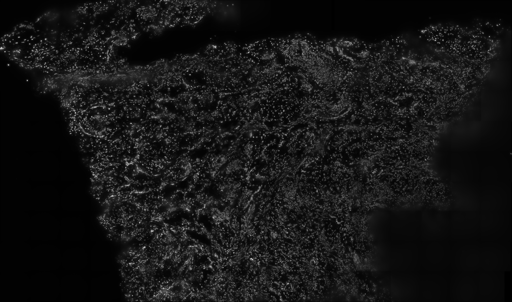

In [14]:
mov[3]

In [17]:
dapich =3



In [18]:
ref2 = np.zeros(empty ).astype(np.uint16)
mov2 = np.zeros(empty ).astype(np.uint16)

In [19]:
ref2[:ref.frame_shape[0],:ref.frame_shape[1]] = np.array(ref[dapich]).astype(np.uint16)
mov2[:mov.frame_shape[0],:mov.frame_shape[1]] = np.array(mov[dapich]).astype(np.uint16)


In [20]:
# mov2[:mov.frame_shape[0],:mov.frame_shape[1]] = np.array(mov[dapich]).astype(np.uint16)
mov2 = np.roll(mov2,-320,axis=1)
mov2 = np.roll(mov2,48,axis=0)

In [27]:
import napari
v = napari.Viewer(ndisplay=2)

v.add_image(ref2,blending='additive',colormap='green')
v.add_image(mov2,blending='additive',colormap='red')

/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/_vispy/vispy_image_layer.py:186: UserWarning: data shape (19813, 33534) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  ndisplay=self.layer._ndisplay,
/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/_vispy/vispy_image_layer.py:186: UserWarning: data shape (19813, 33534) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  ndisplay=self.layer._ndisplay,


<Image layer 'mov2' at 0x7f2440a73d10>

In [14]:
# pims.Frame(ref2)
ref2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [28]:
del ref
del mov

In [19]:

#Translational transformation
sr = StackReg(StackReg.RIGID_BODY)
mta1 = sr.register(
    ref2[quarter[0]:-quarter[0],quarter[1]:-quarter[1]],
    mov2[quarter[0]:-quarter[0],quarter[1]:-quarter[1]]
                             )

In [29]:
quarter = tuple(np.round(np.array(ref2.shape)/5).astype('int'))
# ref2 = ref2[quarter[0]:-quarter[0],quarter[1]:-quarter[1]]
# mov2 = mov2[quarter[0]:-quarter[0],quarter[1]:-quarter[1]]
#Translational transformation
mta1 = calculate_reg(ref2,mov2,
#                      'AFFINE'
                    'RIGID_BODY'
                    )


In [30]:
print(mta1)

[[ 9.99999803e-01 -6.28023792e-04  2.94028801e+01]
 [ 6.28023792e-04  9.99999803e-01  4.06386206e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [28]:
mta1 = np.array([[ 9.99999803e-01, -6.28023792e-04,  2.94028801e+01],
 [ 6.28023792e-04,  9.99999803e-01,  4.06386206e+00],
 [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]
)

In [32]:
# mta1 = np.array([
#        [ 9.99999951e-01, -3.12420350e-04,  3.28717291e+02],
#        [ 3.12420350e-04,  9.99999951e-01, -3.98938467e+01],
#        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]
# )
# mta12 =np.array([[ 3.30847428e+00, -6.85993505e-01, -2.01109655e+03],
#        [-2.63986775e-01,  2.83093389e+00, -7.77174197e+03],
#        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [8]:
# mta1 = np.array([[ 1.00108756e+00,  1.24853472e-04, -1.21100576e+01],
#        [ 3.28726193e-03,  1.00099829e+00, -4.27326598e+01],
#        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [ ]:
sr = StackReg(StackReg.RIGID_BODY)
test1 = sr.transform(mov2,mta1)
# test1 = register(mov2,tmat=mta12,name='AFFINE')

In [29]:
mta1

array([[ 9.99999803e-01, -6.28023792e-04,  2.94028801e+01],
       [ 6.28023792e-04,  9.99999803e-01,  4.06386206e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [30]:
from skimage import transform as tf

test1 = tf.warp(mov2,mta1,preserve_range=True)
# tf.warp(mov2,tform)
# skimage.transform.AffineTransform(
# test1 = np.zeros(mov2.shape).astype(np.float)


# tform = tf.AffineTransform(matrix=mta12)
# test1 = tf.warp(mov2, tform)

In [31]:
import napari
v = napari.Viewer(ndisplay=2)

v.add_image(ref2,blending='additive',colormap='green')
v.add_image(mov2,blending='additive',colormap='red')
v.add_image(test1,blending='additive',colormap='cyan')

/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/_vispy/vispy_image_layer.py:186: UserWarning: data shape (19762, 35557) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  ndisplay=self.layer._ndisplay,
/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/_vispy/vispy_image_layer.py:186: UserWarning: data shape (19762, 35557) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  ndisplay=self.layer._ndisplay,
/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/_vispy/vispy_image_layer.py:186: UserWarning: data shape (19762, 35557) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  ndisplay=self.layer._ndisplay,


<Image layer 'test1' at 0x7fd3943d6dd0>

/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/_vispy/vispy_image_layer.py:186: UserWarning: data shape (19762, 35557) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  ndisplay=self.layer._ndisplay,


In [32]:
import tifffile
from skimage import transform as tf


names = [
#     'cGAMP','YBX1','preGFP','DAPI','postGFP',
#     'CD4','CD69','CPSF6','DAPI',
    '241D','AG3','SIM4','DAPI'
#     ,'GFP-Vpr'
]

xroll = -320
yroll = 48
# tifprj = tf.TiffWriter(prjfile, bigtiff=True, imagej=False)

for i in range(len(mov)):
    prjfile = '/run/media/jmamede/Joao/multiplex/ENDO/out/img3_c'+str(i)+'_registered.ome.tif'
    with tifffile.TiffWriter(prjfile, bigtiff=True, imagej=False) as tif:
        options = dict(
             tile=(4096, 4096),
    #         imagej=False,
            photometric='minisblack',
            compress=9,
            resolution=(0.108, 0.108),
            metadata={'axes': 'YX','unit': 'um',
                'Channel': {'Name': names[i]}}
        )
        print(i)
        mov2 = np.zeros(empty).astype(np.uint16)
#         mov2 = np.zeros((1,)+empty).astype(np.uint16)
        mov2[:mov.frame_shape[0],:mov.frame_shape[1]] = mov[i].astype(np.uint16)

        mov2 = np.roll(mov2,xroll,axis=1)
        mov2 = np.roll(mov2,yroll,axis=0)

        test1 = tf.warp(mov2,mta1,preserve_range=True)
        tif.save( test1.astype(np.uint16),
              **options
            )
        del test1
        del mov2
tif.close()

0


/home/jmamede/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: DeprecationWarning: TiffWriter: the 'compress' parameter is deprecated since 2020.9.30. Use the 'compression' parameter


1
2
3
